<h1>Import librearies</h1>

In [37]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from  xgboost import XGBRegressor
from sklearn import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

<h1>Import data</h1>

In [38]:
sales_data=pd.read_csv("train.csv")
print(sales_data.head())
sales_data.info()

         date  store  item  sales
0  2013-01-01      1     1     13
1  2013-01-02      1     1     11
2  2013-01-03      1     1     14
3  2013-01-04      1     1     13
4  2013-01-05      1     1     10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


<h1>Drop store and item col </h1>

In [39]:
sales_data = sales_data.drop(['store', 'item'], axis=1, errors='ignore')
sales_data.info()
sales_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   sales   913000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 13.9+ MB


,date,sales
0,2013-01-01,13
1,2013-01-02,11
2,2013-01-03,14
3,2013-01-04,13
4,2013-01-05,10


In [41]:
# Ensure the 'date' column is of datetime type
sales_data['date'] = pd.to_datetime(sales_data['date'])

# Convert the 'date' column to a monthly period
sales_data['date'] = sales_data['date'].dt.to_period("M")

# Group by the monthly period and sum the values
monthly_sales = sales_data.groupby('date').sum().reset_index()

# Convert the 'date' column back to a timestamp
monthly_sales['date'] = monthly_sales['date'].dt.to_timestamp()

# Display the first 10 rows of the result
monthly_sales.head(10)


,date,sales
0,2013-01-01,454904
1,2013-02-01,459417
2,2013-03-01,617382
3,2013-04-01,682274
4,2013-05-01,763242
5,2013-06-01,795597
6,2013-07-01,855922
7,2013-08-01,766761
8,2013-09-01,689907
9,2013-10-01,656587


<h1>Visualization</h1>

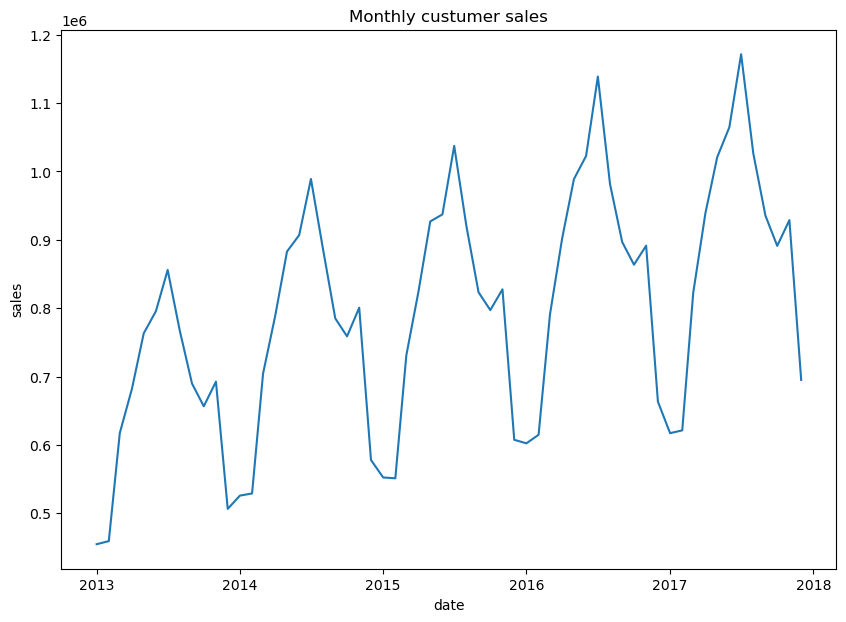

In [43]:
plt.figure(figsize=(10,7))
plt.plot(monthly_sales['date'],monthly_sales['sales'])
plt.xlabel("date")
plt.ylabel("sales")
plt.title("Monthly custumer sales")
plt.show()